In [1]:
### IMPORTS ###

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [2]:
### FUNCTIONS ###

def clean_nulls(dataframe):
    df = dataframe.copy()
    for x in range(0, df.columns.size):
        column_name = df.columns[x]
        count = df[column_name].isnull().sum()
        percent = (count / len(df[column_name]) * 100)
        dtype = df[column_name].dtype
        if count > 0:
            if dtype == 'O':
                df[column_name].fillna('NA', inplace=True)
            elif dtype == 'float64':
                df[column_name].fillna(0, inplace=True)
    return df

def apply_all_transforms(dataframe):
    def encode(x): return 1 if x == 'Partial' else 0
    
    df = dataframe.copy()
    df = clean_nulls(df) # Setting null values to NA for categorical and 0 for numeric
    
    # Perform encoding for categorical features
    df['enc_street']    = pd.get_dummies(train.Street, drop_first=True)
    df['enc_condition'] = train.SaleCondition.apply(encode)
    
    # Remove any features that are not numeric
    df = df.select_dtypes(include=[np.number])
    
    return df

In [3]:
### ACQUIRE DATA ###

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [4]:
### TRANSFORM ###

train_mod = apply_all_transforms(train)
test_mod = apply_all_transforms(test)

In [5]:
### MODEL ###

y = np.log(train_mod.SalePrice)
X = train_mod.drop(['SalePrice', 'Id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


R^2 is: 
 0.865267037971
RMSE is: 
 0.0229627250967


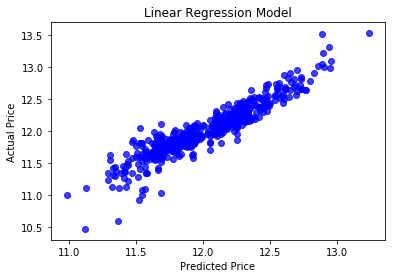

In [6]:
### EVALUATE ###

predictions = model.predict(X_test)

print ("R^2 is: \n", model.score(X_test, y_test))
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()